In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge

In [2]:
import requests
def download(url,filename):
    response=requests.get(url) 
    with open(filename,'wb') as f:
        f.write(response.content)

In [3]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [4]:
download(filepath, "housing.csv")
file_name="housing.csv"

In [5]:
df = pd.read_csv(file_name)

In [6]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [9]:
df.drop(["id","Unnamed:0"],axis=1,inplace=True,errors='ignore') 
print(df.describe())

        Unnamed: 0         price      bedrooms     bathrooms   sqft_living  \
count  21613.00000  2.161300e+04  21600.000000  21603.000000  21613.000000   
mean   10806.00000  5.400881e+05      3.372870      2.115736   2079.899736   
std     6239.28002  3.671272e+05      0.926657      0.768996    918.440897   
min        0.00000  7.500000e+04      1.000000      0.500000    290.000000   
25%     5403.00000  3.219500e+05      3.000000      1.750000   1427.000000   
50%    10806.00000  4.500000e+05      3.000000      2.250000   1910.000000   
75%    16209.00000  6.450000e+05      4.000000      2.500000   2550.000000   
max    21612.00000  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.76631

In [10]:
floor_counts=df['floors'].value_counts() #Count the number of houses for each unique floor value
floor_counts_df=floor_counts.to_frame() #Convert the result to a data frame 
print("Number of houses with unique floor values:",floor_counts_df)

Number of houses with unique floor values:         count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


Text(0.5, 1.0, 'House Price Distribution by Waterfront View')

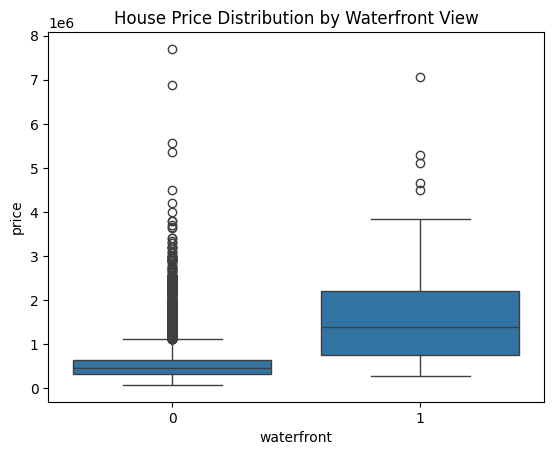

In [11]:
sns.boxplot(x='waterfront',y='price',data=df) 
plt.title('House Price Distribution by Waterfront View')

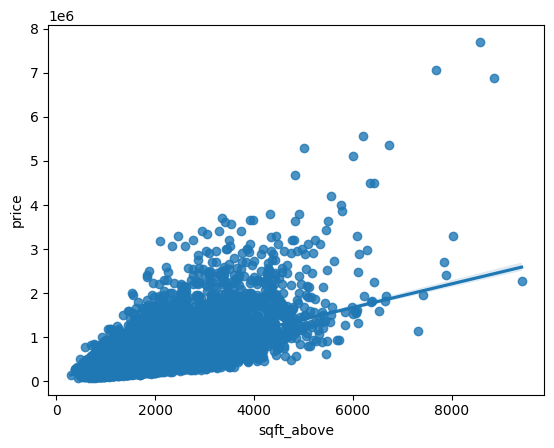

In [12]:
sns.regplot(x='sqft_above',y='price',data=df)
plt.show()

In [13]:
x=df[['sqft_living']] 
y=df['price'] 
lm=LinearRegression() # Create a Linear Regression object
lm.fit(x,y) # Fit the model using the training data
y_pred=lm.predict(x) # Make predictions using the fitted model
r_squared=r2_score(y,y_pred)
print(f"R-squared(R^2) value for predicting price using sqft_living:{r_squared:.4f}")

R-squared(R^2) value for predicting price using sqft_living:0.4929


In [14]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18284\2123396760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace=True)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18284\2123396760.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [15]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 
x_multi = df[features]
y_multi = df['price']
lm_multi = LinearRegression()
lm_multi.fit(x_multi, y_multi)
y_pred_multi = lm_multi.predict(x_multi)
r_squared_multi = r2_score(y_multi, y_pred_multi)
print(f"R-squared (R^2) value for predicting price using multiple features:")
print(f"Features used: {features}")
print(f"R^2 Score: {r_squared_multi:.4f}")

R-squared (R^2) value for predicting price using multiple features:
Features used: ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
R^2 Score: 0.6577


In [16]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 
X = df[features]
y = df['price']
imputer = SimpleImputer(strategy='mean') # or 'median'
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=features, index=X.index)
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X_imputed_df, y)
y_pred_pipe = pipe.predict(X_imputed_df)
r_squared_pipe = r2_score(y, y_pred_pipe)
print(f"R-squared (R^2) value for the Pipeline Model:")
print(f"Features used: {features}")
print(f"Pipeline components: StandardScaler, PolynomialFeatures, LinearRegression")
print(f"R^2 Score: {r_squared_pipe:.4f}")

R-squared (R^2) value for the Pipeline Model:
Features used: ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
Pipeline components: StandardScaler, PolynomialFeatures, LinearRegression
R^2 Score: 0.7513


In [17]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 
x = df[features]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=1)
RigeModel = Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
y_pred_ridge_test = RigeModel.predict(x_test)
r_squared_ridge_test = r2_score(y_test, y_pred_ridge_test)
print(f"Ridge Regression Model (alpha=0.1):")
print(f"Features used: {features}")
print(f"R^2 Score on Test Data: {r_squared_ridge_test:.4f}")

Ridge Regression Model (alpha=0.1):
Features used: ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
R^2 Score on Test Data: 0.6459


In [18]:
pr = PolynomialFeatures(degree=2) #Create a PolynomialFeatures object for second order (degree=2)
x_train_poly = pr.fit_transform(x_train) # Fit the polynomial transformer on the TRAINING data and then transform both train and test data
x_test_poly = pr.transform(x_test) # IMPORTANT: Only transform test data, don't fit again!
RigeModel_poly = Ridge(alpha=0.1) # Create a Ridge regression object with alpha=0.1
RigeModel_poly.fit(x_train_poly, y_train) # Fit the model using the TRANSFORMED training data
y_pred_ridge_poly_test = RigeModel_poly.predict(x_test_poly) #Make predictions using the TRANSFORMED test data
r_squared_ridge_poly_test = r2_score(y_test, y_pred_ridge_poly_test) #Calculate the R-squared (R^2) value using the test data
print(f"Ridge Regression Model with 2nd Order Polynomial Features (alpha=0.1):")
print(f"R^2 Score on Test Data: {r_squared_ridge_poly_test:.4f}")

Ridge Regression Model with 2nd Order Polynomial Features (alpha=0.1):
R^2 Score on Test Data: 0.7544
